# Descripción del Caso a Resolver y Objetivos


Este documento presenta un conjunto de ejercicios prácticos diseñados para explorar la relación entre la complejidad del modelo y el rendimiento de generalización en el contexto del aprendizaje supervisado. El objetivo principal es ajustar parámetros clave de varios modelos de aprendizaje supervisado para entender cómo estos afectan la capacidad del modelo para generalizar sobre datos no vistos. El documento está dividido en dos partes principales: regresión y clasificacionica
### Parte 1: Regresion
En la primera parte, se enfoca en modelos de regresion, donde se investigara como distintos grados de caracteristicas polinomiales afectan el ajuste del modelo. Los objetivos especificos incluyen:


Ajustar modelos de regresión lineal polinomial para grados específicos y evaluar las predicciones.
Calcular los puntajes de coeficiente de determinación (R²) para modelos de distintos grados para identificar niveles de sobreajuste y subajuste.
Determinar el grado de modelo que proporciona un buen rendimiento de gen# eralización.

### Parte 2: Clasificación


La segunda parte se enfoca en un problema de clasificación utilizando un conjunto de datos de hongos para predecir si un hongo es venenoso o no. Los objetivos de esta sección incluyen:


Entrenar un clasificador de árbol de decisión y determinar las características más importantes para la predicción.
Utilizar la función de curva de validación para explorar el impacto del parámetro gamma en la precisión de un clasificador de vectores de soporte (SVC) y determinar su efecto en el ajuste del modelo.
Identificar valores de gamma que resultan en subajuste, sobreajuste y buen rendimiento de generalización.

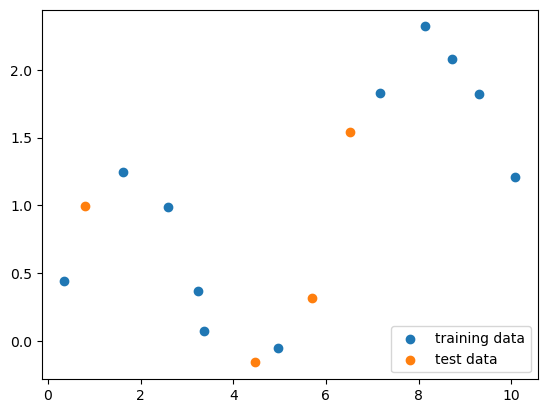

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def intro():
    %matplotlib inline

    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

intro()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="assets/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [9]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    degree_predictions = np.zeros((4, 100))
    x_plot = np.linspace(0, 10, 100).reshape(-1, 1)  # Reshape for compatibility
    
    for i, degree in enumerate([1, 3, 6, 9]):
        # Create polynomial features
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        
        # Fit the Linear Regression model
        model = LinearRegression().fit(X_train_poly, y_train)
        
        # Predict over the interval 0 to 10
        x_plot_poly = poly.transform(x_plot)
        degree_predictions[i, :] = model.predict(x_plot_poly)
        
    return degree_predictions

In [11]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    degree_predictions = np.zeros((4,100))
    x_plot = np.linspace(0, 10, 100).reshape(-1, 1)  # Reshape for compatibility

    for i, degree in enumerate([1, 3, 6, 9]):
        # Create polynomial features
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        
        # Fit the Linear Regression model
        model = LinearRegression().fit(X_train_poly, y_train)
        
        # Predict over the interval 0 to 10
        x_plot_poly = poly.transform(x_plot)
        degree_predictions[i, :] = model.predict(x_plot_poly)
        
    return degree_predictions

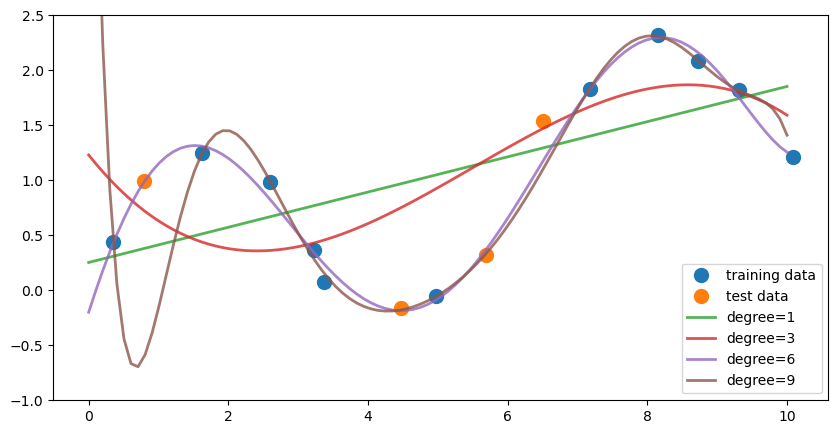

In [13]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return a tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [28]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score

    r2_train = np.zeros(10)
    r2_test = np.zeros(10)
    
    for degree in range(10):
        # Crear características polinomiales
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_poly = poly.transform(X_test.reshape(-1, 1))
        
        # Ajustar el modelo de regresión lineal
        model = LinearRegression().fit(X_train_poly, y_train)
        
        # Predecir valores
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        # Calcular el R^2
        r2_train[degree] = r2_score(y_train, y_train_pred)
        r2_test[degree] = r2_score(y_test, y_test_pred)
    
    return (r2_train, r2_test)

# Llamada a la función para obtener los resultados
r2_results = answer_two()
print("R^2 para entrenamiento:", r2_results[0])
print("R^2 para prueba:", r2_results[1])

R^2 para entrenamiento: [0.         0.42924578 0.4510998  0.58719954 0.91941945 0.97578641
 0.99018233 0.99352509 0.99637545 0.99803706]
R^2 para prueba: [-0.47808642 -0.45237104 -0.06856984  0.00533105  0.73004943  0.87708301
  0.9214094   0.92021504  0.63247949 -0.64524599]


### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

(Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship)

*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

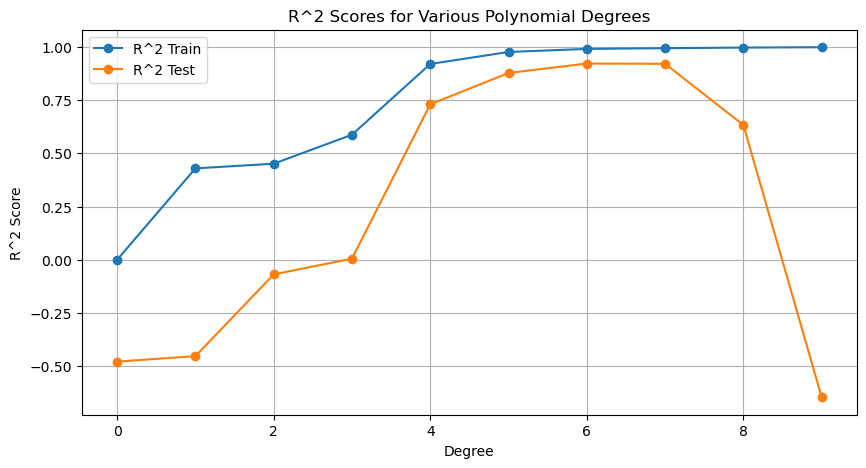

Underfitting degree: 0
Overfitting degree: 9
Good generalization degree: 5


In [30]:
def answer_three():
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # Obtener los resultados del R^2 de la pregunta 2
    r2_train, r2_test = answer_two()
    
    # Graficar los resultados para visualización
    degrees = np.arange(10)
    plt.figure(figsize=(10, 5))
    plt.plot(degrees, r2_train, label='R^2 Train', marker='o')
    plt.plot(degrees, r2_test, label='R^2 Test', marker='o')
    plt.xlabel('Degree')
    plt.ylabel('R^2 Score')
    plt.title('R^2 Scores for Various Polynomial Degrees')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
  # Calcular la diferencia entre los R^2 de entrenamiento y prueba
    r2_diff = r2_train - r2_test
    
    # Underfitting: Bajo R^2 en ambos conjuntos
    underfitting_degree = np.argmin(r2_train + r2_test)
    
    # Overfitting: Gran diferencia, alto R^2 en entrenamiento
    overfitting_degree = np.argmax(r2_diff)
    
    # Buena generalización: Alto R^2 en ambos con pequeña diferencia
    generalization_threshold = 0.1  # Ajusta este valor según sea necesario
    good_generalization_degree = np.argmax((r2_test > 0.5) & (np.abs(r2_diff) < generalization_threshold))
    
    return (underfitting_degree, overfitting_degree, good_generalization_degree)

# Llamada a la función para obtener los grados
degree_results = answer_three()
print("Underfitting degree:", degree_results[0])
print("Overfitting degree:", degree_results[1])
print("Good generalization degree:", degree_results[2])

### Question 4

Training models on high degree polynomial features can result in overfitting. Train two models: a non-regularized LinearRegression model and a Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`, `tol=0.1`) on polynomial features of degree 12. Return the $R^2$ score for LinearRegression and Lasso model's test sets.

*This function should return a tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [34]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    
    # Crear características polinomiales de grado 12
    poly = PolynomialFeatures(degree=12)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))
    
    # Entrenar un modelo LinearRegression
    lin_reg = LinearRegression().fit(X_train_poly, y_train)
    y_test_pred_lin = lin_reg.predict(X_test_poly)
    LinearRegression_R2_test_score = r2_score(y_test, y_test_pred_lin)
    
    # Entrenar un modelo Lasso
    lasso = Lasso(alpha=0.01, max_iter=10000, tol=0.1).fit(X_train_poly, y_train)
    y_test_pred_lasso = lasso.predict(X_test_poly)
    Lasso_R2_test_score = r2_score(y_test, y_test_pred_lasso)
    
    return (LinearRegression_R2_test_score, Lasso_R2_test_score)

# Llamada a la función para obtener los scores R2
r2_scores = answer_four()
print("Linear Regression R2 Test Score:", r2_scores[0])
print("Lasso R2 Test Score:", r2_scores[1])

Linear Regression R2 Test Score: -4.311981228294102
Lasso R2 Test Score: 0.6051396919570066


## Part 2 - Classification

For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to trian a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv("assets/mushrooms.csv")
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:, 2:]
y_mush = mush_df2.iloc[:, 1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

### Question 5

Using `X_train` and `y_train` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

*This function should return a list of length 5 of the feature names in descending order of importance.*

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


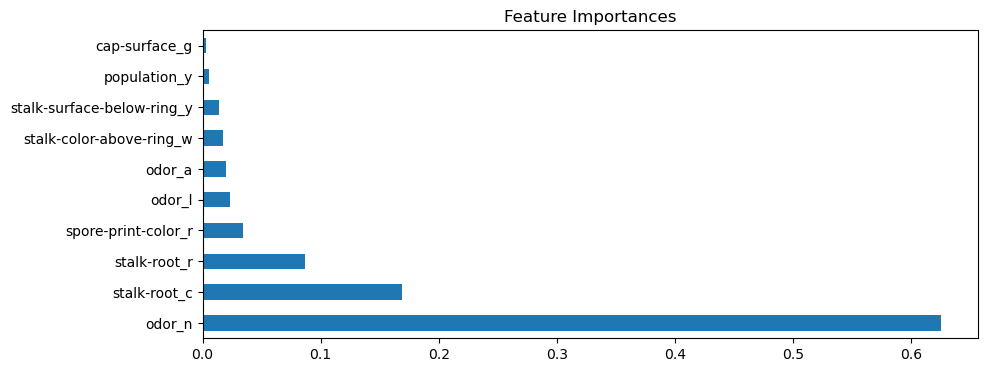

Feature importances: [0.00000000e+00 6.55410817e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.61653285e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.95090125e-02 0.00000000e+00
 0.00000000e+00 2.35036829e-02 0.00000000e+00 6.25143518e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.71218849e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.69175714e-01 0.00000000e+00 8.65891584e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.37353673e-02
 0.

In [42]:
def answer_five():
    # Usa los conjuntos de entrenamiento y prueba ya definidos
    X_train, X_test, y_train, y_test = X_train2, X_test2, y_train2, y_test2
    
    # Entrenar el clasificador de árbol de decisión
    clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
    
    # Imprimir precisión en el conjunto de entrenamiento y prueba
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
    
    # Graficar importancias de características
    feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
    feature_importances.nlargest(10).plot(kind='barh', figsize=(10, 4))
    plt.title('Feature Importances')
    plt.show()
    
    # Imprimir importancias de características
    print('Feature importances: {}'.format(clf.feature_importances_))

# Llamada a la función
answer_five()

### Question 6

For this question, use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.

Create an `SVC` with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  Explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`).

For each level of `gamma`, `validation_curve` will use 3-fold cross validation (use `cv=3, n_jobs=2` as parameters for `validation_curve`), returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets in each fold.

Find the mean score across the five models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return a tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:28: SyntaxWarning: invalid escape sequence '\g'
C:\Users\joaqpach\AppData\Local\Temp\ipykernel_51420\3530465688.py:28: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$\gamma$ (gamma)')


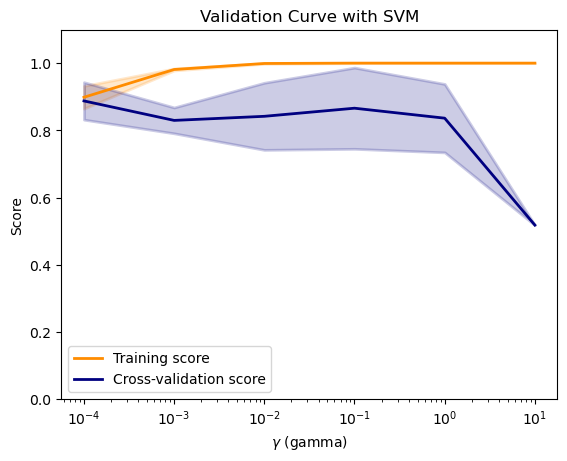

Training scores mean: [0.89838749 0.98104382 0.99895372 1.         1.         1.        ]
Test scores mean: [0.88749385 0.82951748 0.84170359 0.86582964 0.83616445 0.51797144]


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

# Asegúrate de que estas variables están definidas
X = X_mush  # Datos de características
y = y_mush  # Etiquetas

def answer_six():
    param_range = np.logspace(-4, 1, 6)
    
    # Crear un clasificador SVC con los parámetros por defecto y random_state=0
    train_scores, test_scores = validation_curve(
        SVC(kernel='rbf', C=1, random_state=0), X, y,
        param_name='gamma',
        param_range=param_range,
        cv=3, n_jobs=2
    )

    # Calcular la media de los scores a lo largo de las 3 iteraciones de validación
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    # Graficar la curva de validación
    plt.figure()
    plt.title('Validation Curve with SVM')
    plt.xlabel('$\gamma$ (gamma)')
    plt.ylabel('Score')
    plt.ylim(0.0, 1.1)
    lw = 2

    plt.semilogx(param_range, train_scores_mean, label='Training score',
                 color='darkorange', lw=lw)
    plt.fill_between(param_range, train_scores_mean - np.std(train_scores, axis=1),
                     train_scores_mean + np.std(train_scores, axis=1), alpha=0.2,
                     color='darkorange', lw=lw)

    plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
                 color='navy', lw=lw)
    plt.fill_between(param_range, test_scores_mean - np.std(test_scores, axis=1),
                     test_scores_mean + np.std(test_scores, axis=1), alpha=0.2,
                     color='navy', lw=lw)

    plt.legend(loc='best')
    plt.show()
    
    # Devolver los scores medios como una tupla
    return train_scores_mean, test_scores_mean

# Llamada a la función
train_scores_mean, test_scores_mean = answer_six()
print("Training scores mean:", train_scores_mean)
print("Test scores mean:", test_scores_mean)

### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting? What gamma value corresponds to a model that is overfitting? What choice of gamma would provide a model with good generalization performance on this dataset? 

(Hint: Try plotting the scores from question 6 to visualize the relationship)

*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def answer_seven():
    # Encontrar el índice del valor de gamma que corresponde a underfitting y overfitting
    underfitting_gamma = param_range[np.argmin(train_scores_mean + test_scores_mean)]
    overfitting_gamma = param_range[np.argmax(train_scores_mean - test_scores_mean)]

    # Para buena generalización, buscamos un alto score tanto en entrenamiento como en validación
    # y poca diferencia entre ambos
    generalization_threshold = 0.1
    good_generalization_index = np.argmax((test_scores_mean > 0.5) & 
                                          (np.abs(train_scores_mean - test_scores_mean) < generalization_threshold))
    good_generalization_gamma = param_range[good_generalization_index]
    
    return (underfitting_gamma, overfitting_gamma, good_generalization_gamma)

# Llamada a la función
gamma_results = answer_seven()
print("Underfitting gamma:", gamma_results[0])
print("Overfitting gamma:", gamma_results[1])
print("Good generalization gamma:", gamma_results[2])

NameError: name 'param_range' is not defined